In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

df = pd.read_excel('Amazon_Seller_Data_20_21_22.xlsx')
df.head()

,activity_period,marketplace,transaction_type,asin,product_name,product_type,qty,item_weight,total_activity_weight,price_of_items_amt_vat_excl,...,arrival_country,arrival_post_code,sale_depart_country,sale_arrival_country,transportation_mode,delivery_conditions,taxable_jurisdiction,export_outside_eu,tax_reporting_scheme,tax_collection_responsibility
0,2020-03-01,amazon.de,SALE,B083LZ1GJD,Eco Roll Clear - Waschbare Fusselrolle,Eco Roll,1,0.55,0.55,12.6,...,DE,30900,DE,DE,CONSIGNMENT_BY_POST,DAP,GERMANY,NO,NaN,NaN
1,2020-03-01,amazon.de,SALE,B083LZ1GJD,Eco Roll Clear - Waschbare Fusselrolle,Eco Roll,1,0.55,0.55,12.6,...,DE,79761,DE,DE,CONSIGNMENT_BY_POST,DAP,GERMANY,NO,NaN,NaN
2,2020-03-01,amazon.de,SALE,B083LZ1GJD,Eco Roll Clear - Waschbare Fusselrolle,Eco Roll,1,0.55,0.55,12.6,...,DE,14469,DE,DE,CONSIGNMENT_BY_POST,DAP,GERMANY,NO,NaN,NaN
3,2020-03-01,amazon.de,SALE,B083LZ1GJD,Eco Roll Clear - Waschbare Fusselrolle,Eco Roll,1,0.55,0.55,16.8,...,DE,02794,DE,DE,CONSIGNMENT_BY_POST,DAP,GERMANY,NO,NaN,NaN
4,2020-03-01,amazon.de,SALE,B083LZ1GJD,Eco Roll Clear - Waschbare Fusselrolle,Eco Roll,2,0.55,1.10,25.2,...,DE,89312,DE,DE,CONSIGNMENT_BY_POST,DAP,GERMANY,NO,NaN,NaN


In [2]:
numerical = df.select_dtypes(np.number)
categorical = df.select_dtypes('object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   activity_period                    9538 non-null   datetime64[ns]
 1   marketplace                        8938 non-null   object        
 2   transaction_type                   9538 non-null   object        
 3   asin                               9538 non-null   object        
 4   product_name                       9521 non-null   object        
 5   product_type                       9521 non-null   object        
 6   qty                                9538 non-null   int64         
 7   item_weight                        8681 non-null   float64       
 8   total_activity_weight              8680 non-null   float64       
 9   price_of_items_amt_vat_excl        8093 non-null   float64       
 10  total_price_of_items_amt_vat_excl  8

In [4]:
numerical.dropna(inplace=True)

In [5]:
X = numerical['item_weight']
y = numerical['total_ship_charge_amt_vat_excl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test

8598    0.0
8976    0.0
2229    0.0
6572    0.0
8884    0.0
       ... 
6571    0.0
3422    0.0
8629    0.0
8626    0.0
6957    0.0
Name: total_ship_charge_amt_vat_excl, Length: 750, dtype: float64

In [6]:
X_train.shape

(2998,)

In [13]:
X_train = X_train.array.reshape(-1, 1)

In [8]:
numerical.columns

Index(['qty', 'item_weight', 'total_activity_weight',
       'price_of_items_amt_vat_excl', 'total_price_of_items_amt_vat_excl',
       'ship_charge_amt_vat_excl', 'total_ship_charge_amt_vat_excl',
       'total_activity_value_amt_vat_excl', 'price_of_items_vat_rate_percent',
       'price_of_items_vat_amt', 'total_price_of_items_vat_amt',
       'ship_charge_vat_rate_percent', 'ship_charge_vat_amt',
       'total_ship_charge_vat_amt', 'total_activity_value_vat_amt',
       'price_of_items_amt_vat_incl', 'total_price_of_items_amt_vat_incl',
       'ship_charge_amt_vat_incl', 'total_ship_charge_amt_vat_incl',
       'total_activity_value_amt_vat_incl'],
      dtype='object')

In [14]:
X_train

<PandasArray>
[
[1.41],
[0.04],
[1.63],
[1.73],
[0.55],
[1.41],
[1.32],
[1.41],
[0.04],
[0.04],
[1.41],
[1.41],
[0.04],
[1.41],
[1.73],
[0.04],
[1.41],
[1.32],
[1.41],
[1.73],
[1.41],
[1.41],
[1.41],
[0.55],
[1.41],
[0.04],
[0.04],
[1.41],
[1.73],
[1.41],
[0.04],
[0.04],
[1.32],
[1.41],
[1.73],
[1.41],
[1.41],
[1.41],
[0.55],
[1.41],
[1.41],
[0.04],
[1.32],
[0.04],
[1.41],
[1.41],
[1.41],
[1.41],
[0.04],
[0.04],
[1.41],
[1.32],
[0.04],
[0.04],
[1.41],
[1.73],
[0.04],
[1.41],
[0.04],
[0.55],
[1.41],
[0.04],
[0.04],
[1.41],
[0.04],
[0.55],
[1.63],
[1.06],
[1.73],
[1.41],
[0.04],
[0.28],
[0.04],
[1.41],
[1.32],
[0.04],
[1.41],
[0.04],
[1.73],
[1.63],
[0.04],
[0.04],
[0.55],
[0.04],
[0.04],
[1.41],
[1.41],
[1.41],
[1.73],
[1.32],
[1.41],
[0.04],
[1.41],
[1.41],
[0.04],
[1.32],
[1.41],
[0.04],
[1.32],
[0.04],
[1.63],
[0.04],
[1.41],
[0.04],
[1.41],
[0.05],
[0.04],
[1.41],
[1.41],
[1.41],
[1.41],
[1.32],
[1.41],
[1.32],
[1.41],
[1.73],
[0.04],
[1.32],
[1.32],
[1.41],
[1.32],
[1.32],
[0.04],


In [15]:
from sklearn.preprocessing import StandardScaler

#object = class
scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(X_train)

In [16]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [17]:
model.coef_

array([0.10370636])

In [18]:
model.intercept_

0.429462975316878

In [27]:
X_test = X_test.array.reshape(-1, 1)

,y_test,y_pred,residual
8598,0.0,0.553446,-0.553446
8976,0.0,0.288157,-0.288157
2229,0.0,0.503214,-0.503214
6572,0.0,0.489086,-0.489086
8884,0.0,0.553446,-0.553446
...,...,...,...
6571,0.0,0.503214,-0.503214
3422,0.0,0.503214,-0.503214
8629,0.0,0.553446,-0.553446
8626,0.0,0.288157,-0.288157


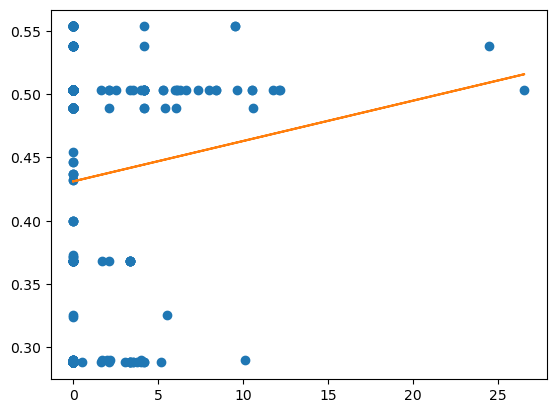

In [28]:
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)
res_df

In [29]:
rmse = np.sqrt(mse(y_test,y_pred))

In [30]:
rmse

2.1172080528235955

In [31]:
R2=r2_score(y_test,y_pred)
R2

0.0019396013210251084

In [32]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.0006052959751975395